In [12]:
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt

In [2]:
train_features_path = '/Users/amandeep/Github/table-linker/data/SemTabR4_T2dv2/table-linker/train1-output/v10_342_files/features'

In [3]:
features = ['pagerank','retrieval_score','monge_elkan','monge_elkan_aliases','des_cont_jaccard',
            'jaro_winkler','levenshtein','singleton','num_char','num_tokens',
           'lof_class_count_tf_idf_score', 'lof_property_count_tf_idf_score',
           'lof-graph-embedding-score', 'lof-reciprocal-rank', 'context_score', 'evaluation_label', 'is_lof']

In [4]:
def read_training_data(feature_path):
    df_list = []
    for file in glob(feature_path + '/*.csv'):
        if os.path.getsize(file) == 0:
                    continue
        df_list.append(pd.read_csv(file))
    return pd.concat(df_list)



In [5]:
train_df = read_training_data(train_features_path)
train_df = train_df[train_df['evaluation_label'] != 0]

In [6]:
train_df.head()

,column,row,label,context,label_clean,kg_id,kg_labels,kg_aliases,method,kg_descriptions,...,singleton,vote_by_classifier,is_lof,lof-graph-embedding-score,lof-reciprocal-rank,lof_class_count_tf_idf_score,top5_class_count,lof_property_count_tf_idf_score,top5_property_count,context_score
0,0,0,Casco Vejo,29.1942|Archaeological Site of Panamá Viejo an...,Casco Vejo,NaN,NaN,NaN,exact-match,NaN,...,0,0,-1,0.000000,0.009901,0.000000,NaN,0.000000,NaN,0.0
1,0,0,Casco Vejo,29.1942|Archaeological Site of Panamá Viejo an...,Casco Vejo,Q15883203,VEJO,VEJO|Jos Verhulst,fuzzy-augmented,Belgian draughtsperson and cartoonist,...,0,0,-1,0.534445,0.021277,0.023459,Q24229398:0.010|Q23958946:0.009|Q16887380:0.00...,-0.004284,P106:0.000|P1477:0.000|P21:0.000|P27:0.000|P56...,0.0
2,0,0,Casco Vejo,29.1942|Archaeological Site of Panamá Viejo an...,Casco Vejo,Q21694115,Adrián Fernández Casco,"Casco, A. F. |Adrian Fernandez Casco|Adrián F....",fuzzy-augmented,NaN,...,0,0,-1,0.512314,0.018519,0.071817,Q24229398:0.010|Q386724:0.009|Q23958946:0.009|...,-0.004284,P21:0.000|P27:0.000|P39:0.000|P735:0.000|P31:-...,0.0
3,0,0,Casco Vejo,29.1942|Archaeological Site of Panamá Viejo an...,Casco Vejo,Q58821308,Mirian Casco,"M. Casco|Casco, M.",fuzzy-augmented,researcher ORCID ID = 0000-0002-7189-3497,...,0,0,-1,0.462551,0.011364,0.023459,Q24229398:0.010|Q23958946:0.009|Q16887380:0.00...,-0.004284,P106:0.000|P108:0.000|P1153:0.000|P21:0.000|P4...,0.0
4,0,0,Casco Vejo,29.1942|Archaeological Site of Panamá Viejo an...,Casco Vejo,Q6299475,Juan Casco,"J. Casco|Casco, J.",fuzzy-augmented,Paraguayan footballer,...,0,0,-1,0.500350,0.016393,0.025446,Q24229398:0.010|Q23958946:0.009|Q16887380:0.00...,-0.004284,P106:0.000|P19:0.000|P21:0.000|P2446:0.000|P27...,0.0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215624 entries, 0 to 34210
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   column                           int64  
 1   row                              int64  
 2   label                            object 
 3   context                          object 
 4   label_clean                      object 
 5   kg_id                            object 
 6   kg_labels                        object 
 7   kg_aliases                       object 
 8   method                           object 
 9   kg_descriptions                  object 
 10  pagerank                         float64
 11  retrieval_score                  float64
 12  GT_kg_id                         object 
 13  GT_kg_label                      object 
 14  evaluation_label                 int64  
 15  aligned_pagerank                 float64
 16  monge_elkan                      float64
 17  monge_elka

In [8]:
train_df['singleton'].value_counts()

0    2207391
1       8233
Name: singleton, dtype: int64

In [9]:
train_df['evaluation_label'].value_counts()

-1    2183634
 1      31990
Name: evaluation_label, dtype: int64

In [10]:
train_df['is_lof'].value_counts()

-1    2183661
 1      31963
Name: is_lof, dtype: int64

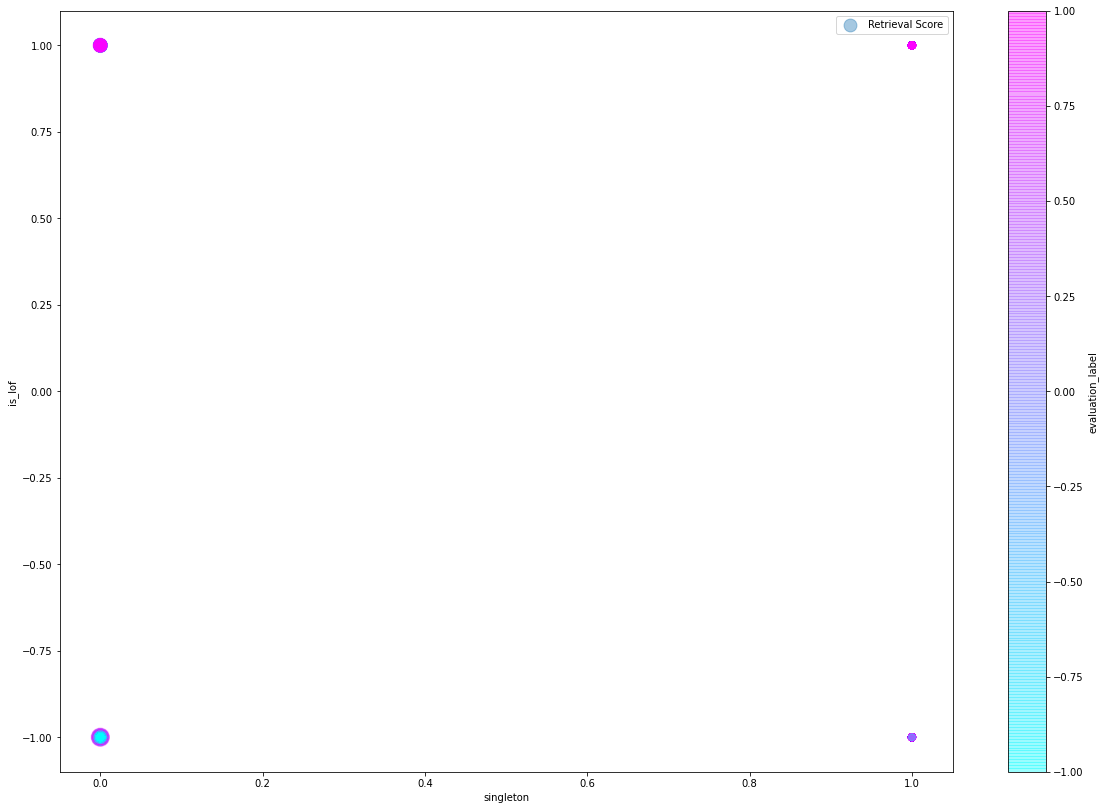

In [13]:
train_df.plot(kind="scatter", x="singleton", y="is_lof", alpha=0.4,
    s=train_df['retrieval_score']*3, label="Retrieval Score", figsize=(20,14),
    c="evaluation_label", cmap=plt.get_cmap("cool"), colorbar=True,
    sharex=False)
plt.legend()

In [17]:
train_df = train_df[features]

In [18]:
train_df.describe()

,pagerank,retrieval_score,monge_elkan,monge_elkan_aliases,des_cont_jaccard,jaro_winkler,levenshtein,singleton,num_char,num_tokens,lof_class_count_tf_idf_score,lof_property_count_tf_idf_score,lof-graph-embedding-score,lof-reciprocal-rank,context_score,evaluation_label,is_lof
count,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06,2.215624e+06
mean,1.682735e-06,1.724066e+01,7.385055e-01,4.684947e-01,1.292887e-02,6.574227e-01,4.537107e-01,3.715883e-03,3.663199e+01,4.546317e+00,1.864140e-01,1.137824e-01,5.393820e-01,4.311134e-02,2.930971e-02,-9.711233e-01,-9.711476e-01
std,5.024220e-05,4.826471e+00,1.793375e-01,3.513830e-01,6.260201e-02,2.291211e-01,2.637262e-01,6.084470e-02,4.483665e+01,5.376583e+00,2.995943e-01,2.333159e-01,1.886862e-01,1.066940e-01,1.011441e-01,2.385784e-01,2.384791e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.305142e-02,-1.914165e+00,-2.094419e-01,3.164557e-03,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.842326e-09,1.448916e+01,6.583333e-01,0.000000e+00,0.000000e+00,4.957265e-01,2.500000e-01,0.000000e+00,1.200000e+01,2.000000e+00,0.000000e+00,0.000000e+00,4.393286e-01,1.052632e-02,0.000000e+00,-1.000000e+00,-1.000000e+00
50%,2.842326e-09,1.631559e+01,7.541667e-01,6.015873e-01,0.000000e+00,6.397059e-01,4.117647e-01,0.000000e+00,1.800000e+01,2.000000e+00,2.883212e-02,1.215077e-02,5.410428e-01,1.587302e-02,0.000000e+00,-1.000000e+00,-1.000000e+00
75%,4.747050e-09,1.883905e+01,8.577778e-01,7.500000e-01,0.000000e+00,8.647059e-01,6.129032e-01,0.000000e+00,4.300000e+01,5.000000e+00,2.204981e-01,9.891171e-02,6.623219e-01,3.125000e-02,0.000000e+00,-1.000000e+00,-1.000000e+00
max,8.534953e-03,1.109175e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.640000e+02,7.600000e+01,1.000000e+00,2.914165e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


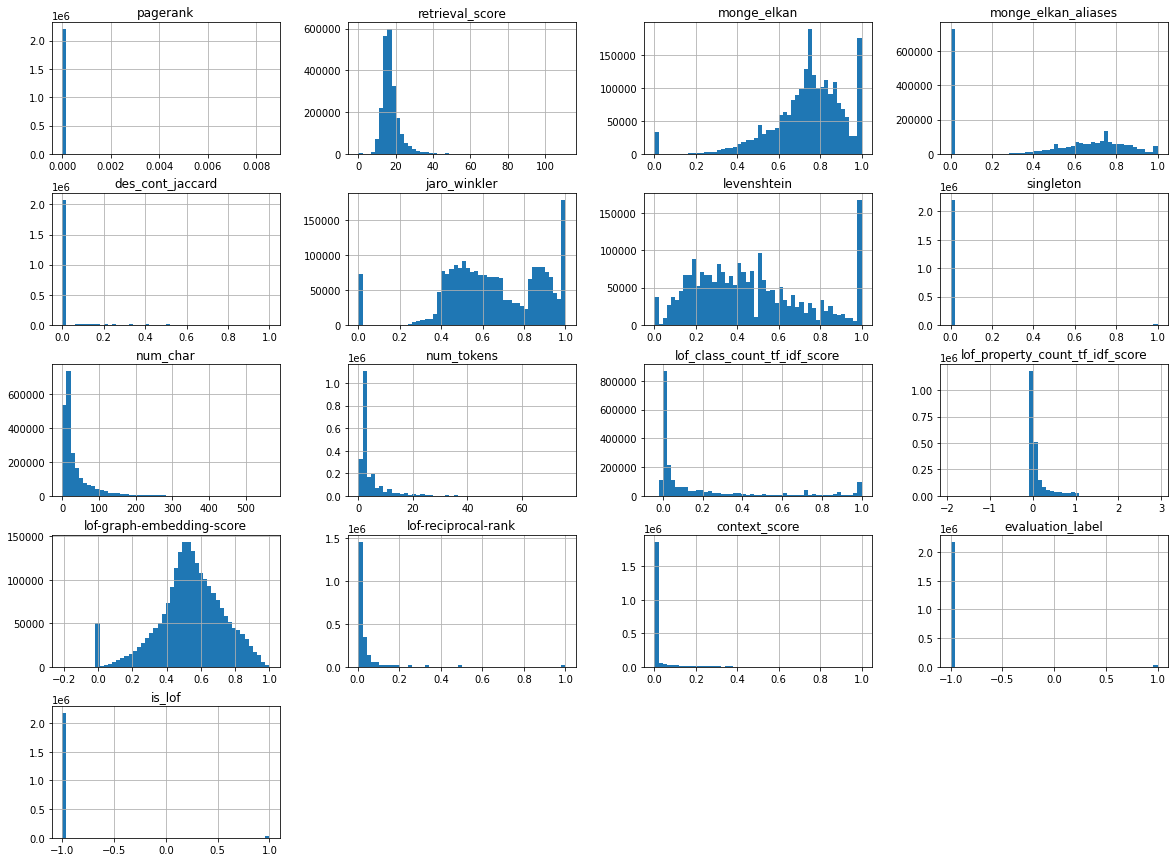

In [19]:
%matplotlib inline
train_df.hist(bins=50, figsize=(20,15))
plt.show()

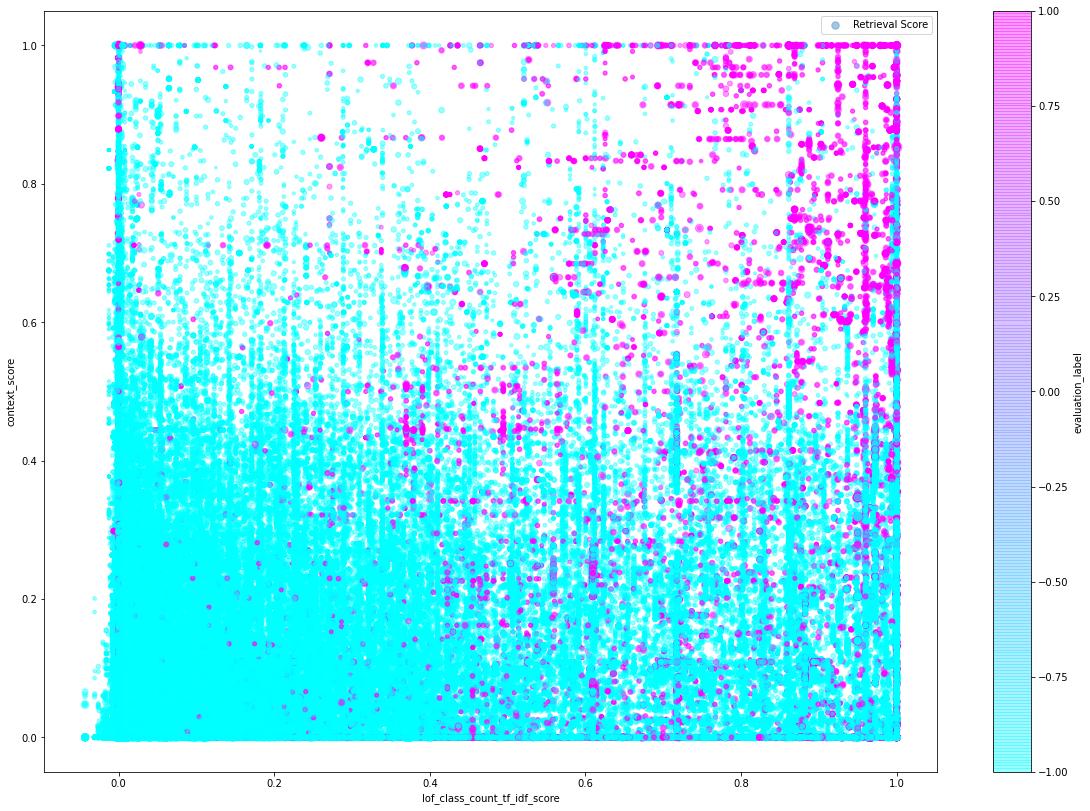

In [29]:
train_df.plot(kind="scatter", x="lof_class_count_tf_idf_score", y="context_score", alpha=0.4,
    s=train_df['retrieval_score'], label="Retrieval Score", figsize=(20,14),
    c="evaluation_label", cmap=plt.get_cmap("cool"), colorbar=True,
    sharex=False)
plt.legend()

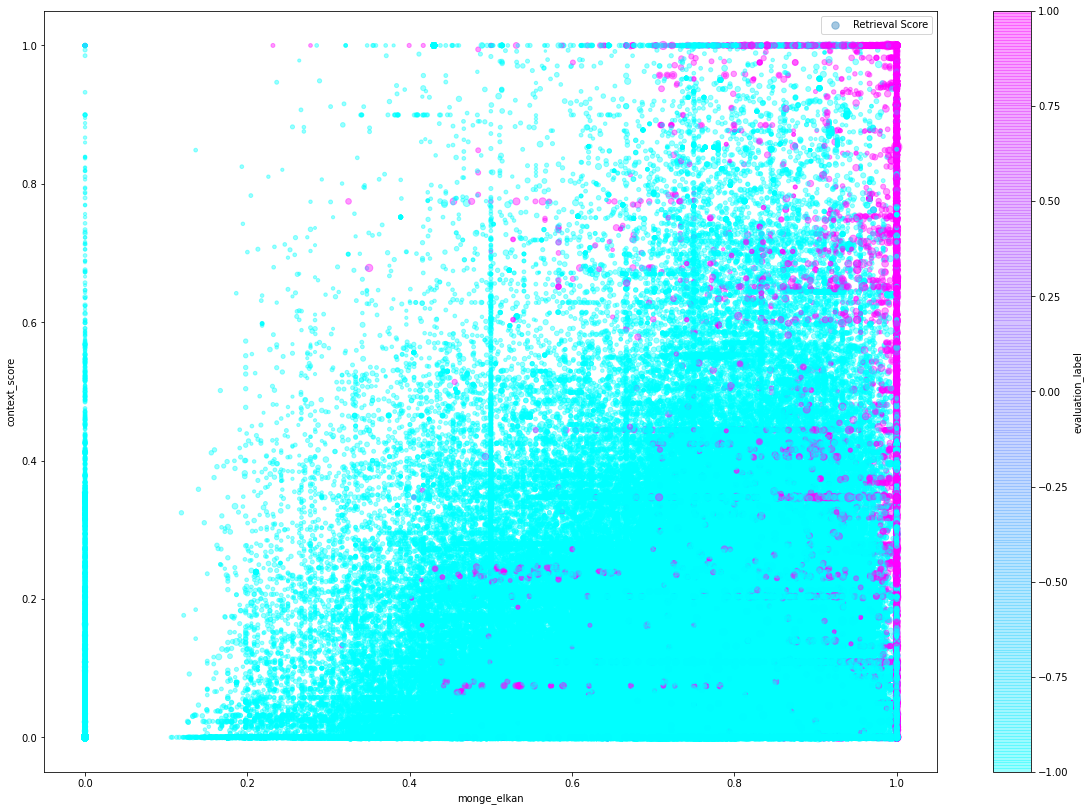

In [30]:
train_df.plot(kind="scatter", x="monge_elkan", y="context_score", alpha=0.4,
    s=train_df['retrieval_score'], label="Retrieval Score", figsize=(20,14),
    c="evaluation_label", cmap=plt.get_cmap("cool"), colorbar=True,
    sharex=False)
plt.legend()

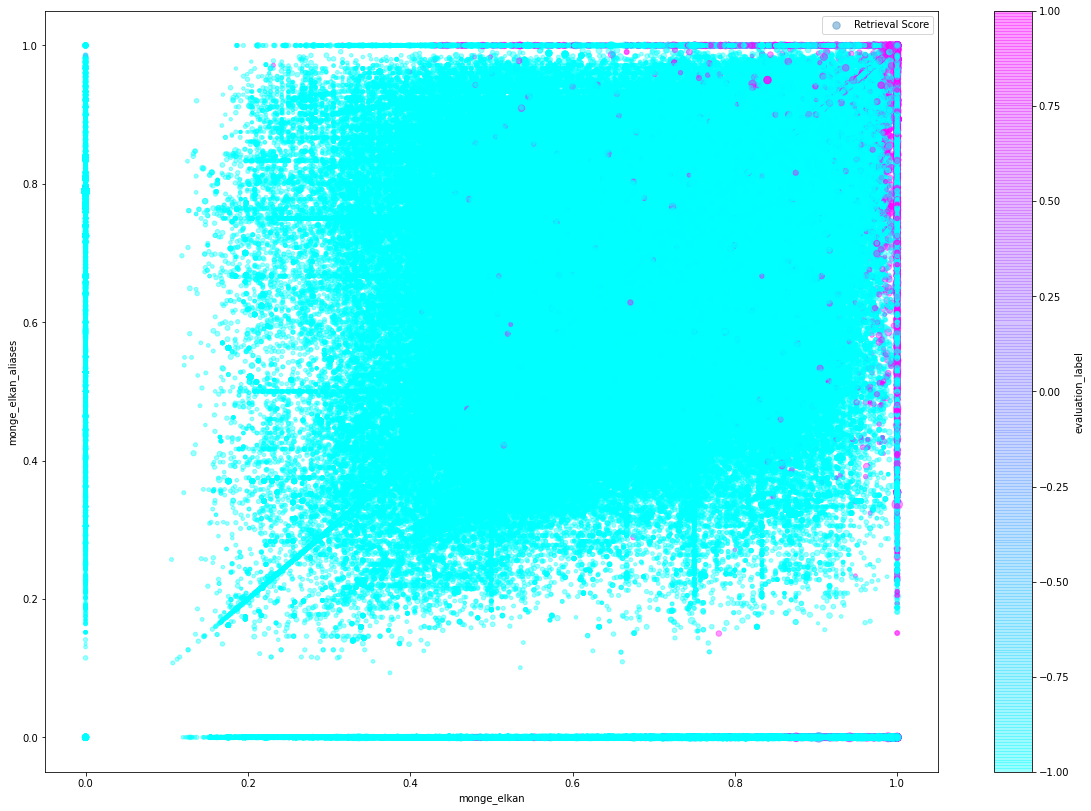

In [31]:
train_df.plot(kind="scatter", x="monge_elkan", y="monge_elkan_aliases", alpha=0.4,
    s=train_df['retrieval_score'], label="Retrieval Score", figsize=(20,14),
    c="evaluation_label", cmap=plt.get_cmap("cool"), colorbar=True,
    sharex=False)
plt.legend()

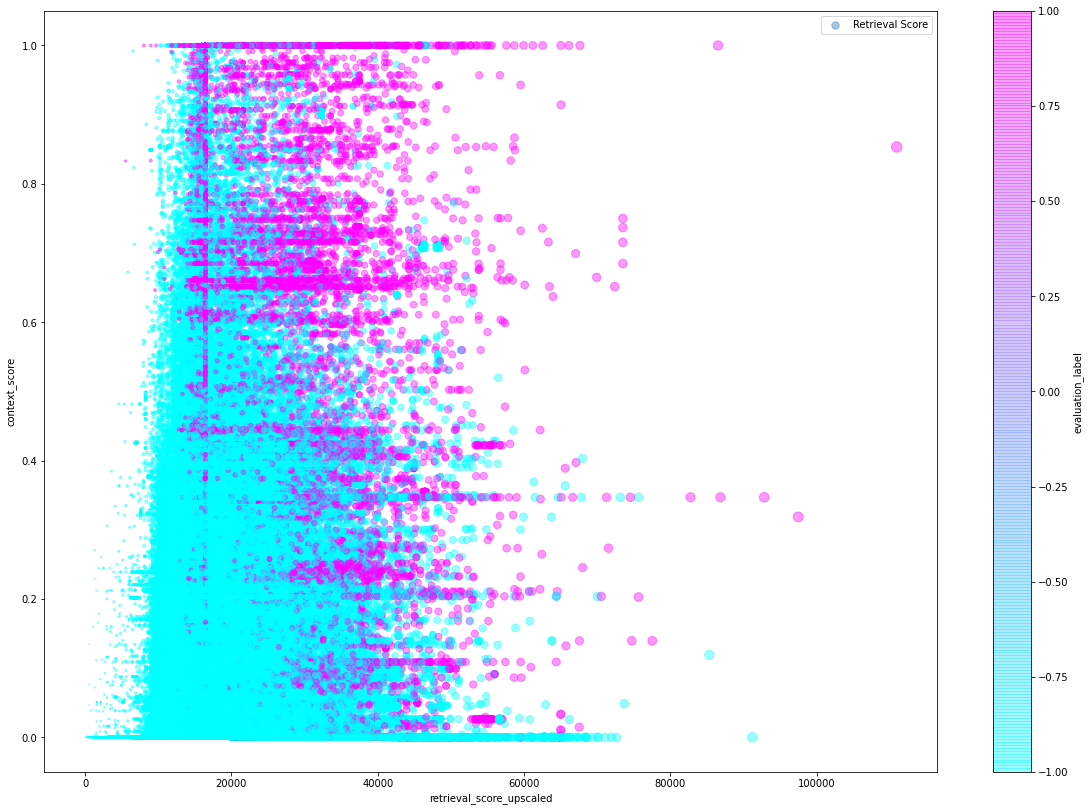

In [32]:
train_df['retrieval_score_upscaled'] = train_df['retrieval_score'].map(lambda x: x*1000)
train_df.plot(kind="scatter", x="retrieval_score_upscaled", y="context_score", alpha=0.4,
    s=train_df['retrieval_score'], label="Retrieval Score", figsize=(20,14),
    c="evaluation_label", cmap=plt.get_cmap("cool"), colorbar=True,
    sharex=False)
plt.legend()

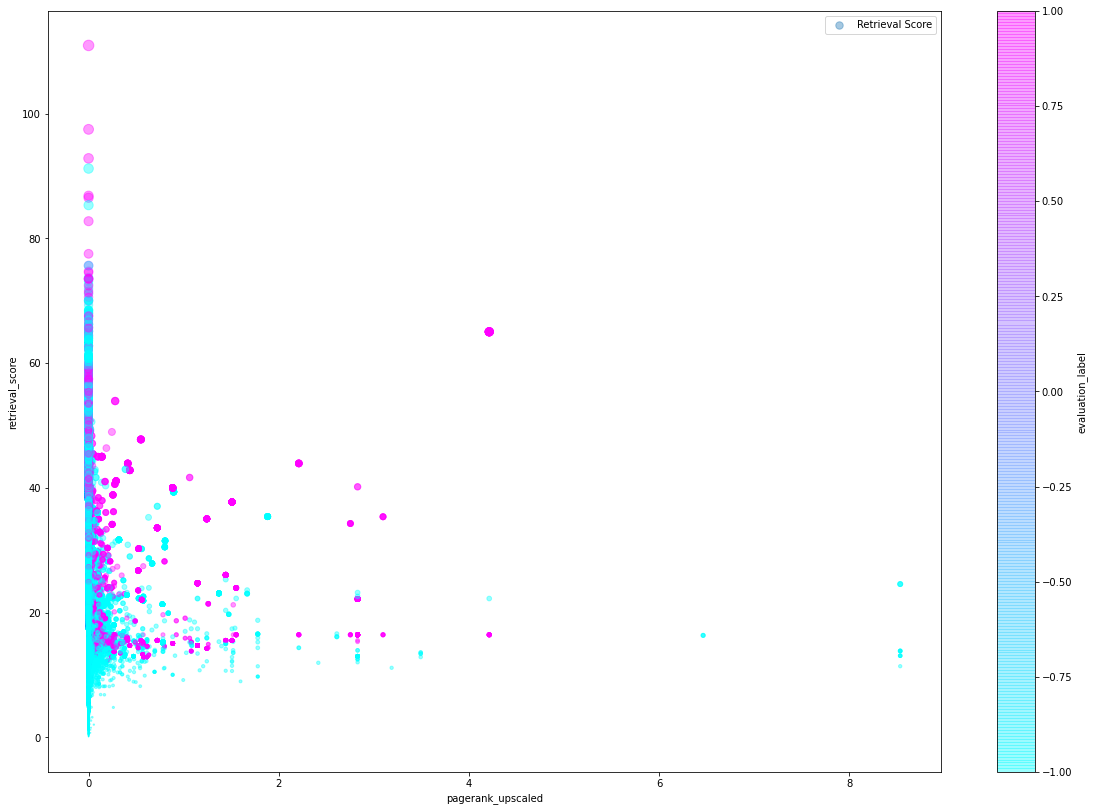

In [33]:
train_df['pagerank_upscaled'] = train_df['pagerank'].map(lambda x: x*1000)
train_df.plot(kind="scatter", x="pagerank_upscaled", y="retrieval_score", alpha=0.4,
    s=train_df['retrieval_score'], label="Retrieval Score", figsize=(20,14),
    c="evaluation_label", cmap=plt.get_cmap("cool"), colorbar=True,
    sharex=False)
plt.legend()

In [25]:
corr_features = ['pagerank','retrieval_score','monge_elkan'
                 ,'num_tokens', 'lof_class_count_tf_idf_score',
                 'lof-graph-embedding-score', 'context_score', 'evaluation_label']

In [26]:
train_df_corr = train_df[corr_features]

In [27]:
corr_matrix = train_df_corr.corr()

array([[<AxesSubplot:xlabel='pagerank', ylabel='pagerank'>,
        <AxesSubplot:xlabel='retrieval_score', ylabel='pagerank'>,
        <AxesSubplot:xlabel='monge_elkan', ylabel='pagerank'>,
        <AxesSubplot:xlabel='num_tokens', ylabel='pagerank'>,
        <AxesSubplot:xlabel='lof_class_count_tf_idf_score', ylabel='pagerank'>,
        <AxesSubplot:xlabel='lof-graph-embedding-score', ylabel='pagerank'>,
        <AxesSubplot:xlabel='context_score', ylabel='pagerank'>,
        <AxesSubplot:xlabel='evaluation_label', ylabel='pagerank'>],
       [<AxesSubplot:xlabel='pagerank', ylabel='retrieval_score'>,
        <AxesSubplot:xlabel='retrieval_score', ylabel='retrieval_score'>,
        <AxesSubplot:xlabel='monge_elkan', ylabel='retrieval_score'>,
        <AxesSubplot:xlabel='num_tokens', ylabel='retrieval_score'>,
        <AxesSubplot:xlabel='lof_class_count_tf_idf_score', ylabel='retrieval_score'>,
        <AxesSubplot:xlabel='lof-graph-embedding-score', ylabel='retrieval_score'>,
      

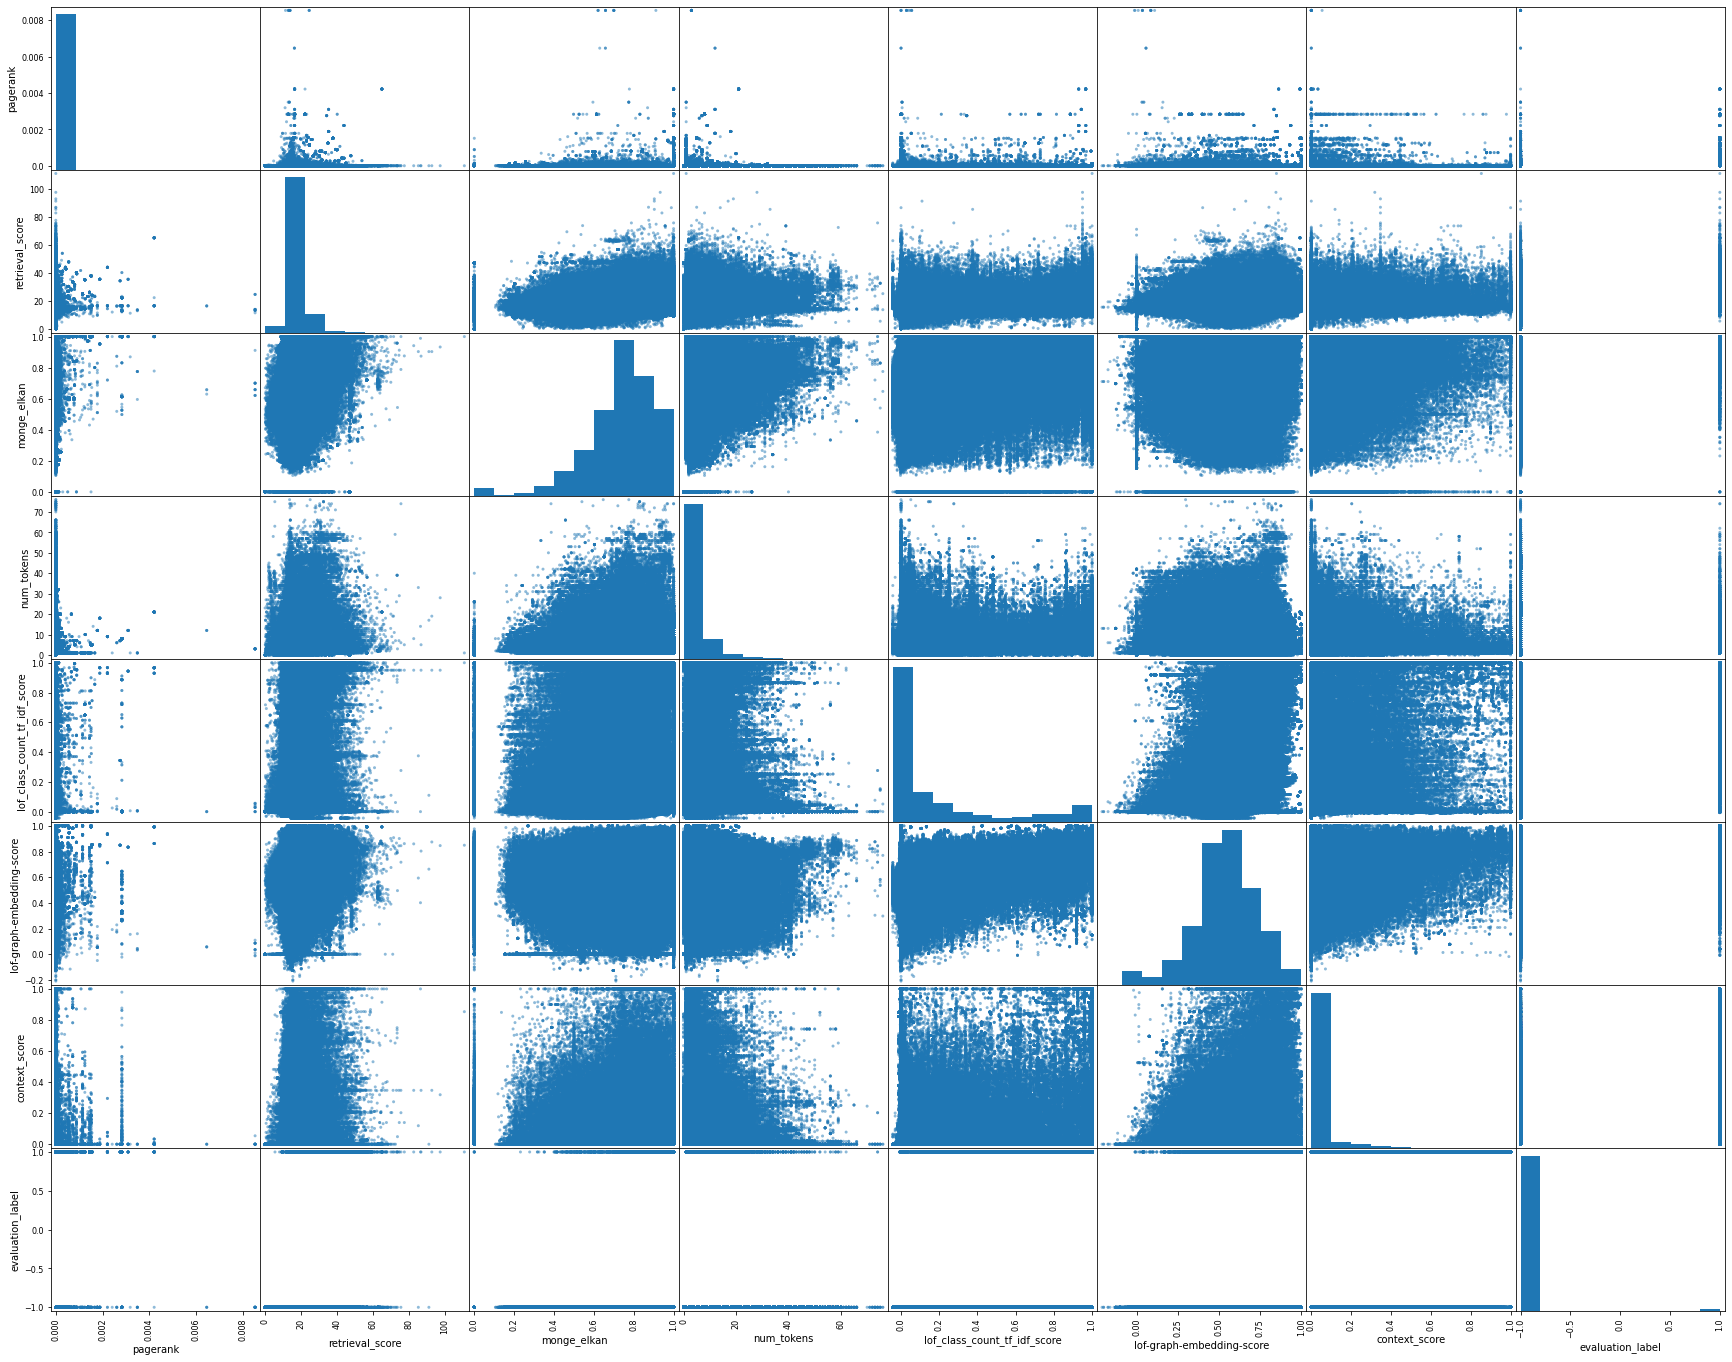

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df_corr, figsize=(30, 24))

In [ ]:
corr_features = ['pagerank','retrieval_score','monge_elkan','num_tokens', 'lof_class_count_tf_idf_score','lof-graph-embedding-score', 'context_score']